In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words
import io
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

In [20]:
df = pd.read_csv("Uber_Ride_Reviews.csv")

# EDA

In [21]:
df.head()

,ride_review,ride_rating,sentiment
0,I completed running New York Marathon requeste...,1.0,0
1,My appointment time auto repairs required earl...,1.0,0
2,Whether I using Uber ride service Uber Eats or...,1.0,0
3,Why hard understand I trying retrieve Uber cab...,1.0,0
4,I South Beach FL I staying major hotel ordered...,1.0,0


In [22]:
df.shape

(1344, 3)

In [23]:
df.dtypes

ride_review     object
ride_rating    float64
sentiment        int64
dtype: object

In [24]:
df['ride_rating'] = df['ride_rating'].astype(int)

In [25]:
df.dtypes

ride_review    object
ride_rating     int32
sentiment       int64
dtype: object

In [26]:
df.columns

Index(['ride_review', 'ride_rating', 'sentiment'], dtype='object')

In [27]:
df.isnull().sum()

ride_review    0
ride_rating    0
sentiment      0
dtype: int64

In [28]:
df['ride_rating'].value_counts()

1    1041
5     124
2      70
4      59
3      50
Name: ride_rating, dtype: int64

In [29]:
df['review_length'] = df['ride_review'].apply(len)
df.head()

,ride_review,ride_rating,sentiment,review_length
0,I completed running New York Marathon requeste...,1,0,2259
1,My appointment time auto repairs required earl...,1,0,1147
2,Whether I using Uber ride service Uber Eats or...,1,0,661
3,Why hard understand I trying retrieve Uber cab...,1,0,445
4,I South Beach FL I staying major hotel ordered...,1,0,304


In [30]:
df['ride_rating'].value_counts()

1    1041
5     124
2      70
4      59
3      50
Name: ride_rating, dtype: int64

In [31]:
df['sentiment'].value_counts()

0    1111
1     233
Name: sentiment, dtype: int64

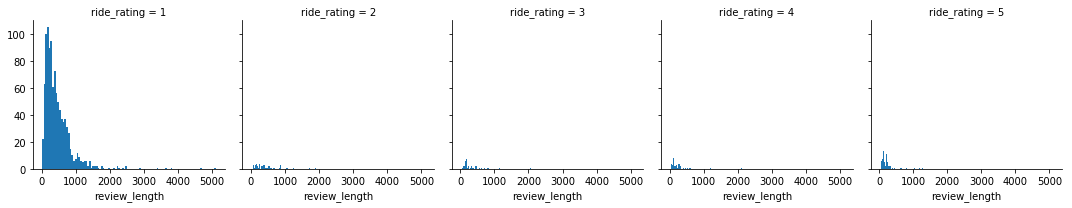

In [32]:
g = sns.FacetGrid(data=df, col='ride_rating')
g.map(plt.hist, 'review_length', bins=100)

As seen above, the worst ratings usually have a higher word count in the review.

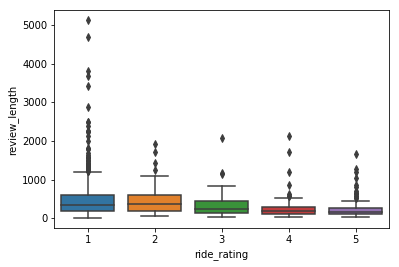

In [33]:
sns.boxplot(x=df['ride_rating'], y=df['review_length'], data=df)

There's a lot of outliers when the ride rating = 1(worst rating) and the lower the rating, the review length increases which means they have a negative correlation.

In [34]:
df.corr()

,ride_rating,sentiment,review_length
ride_rating,1.000000,0.950908,-0.156503
sentiment,0.950908,1.000000,-0.153692
review_length,-0.156503,-0.153692,1.000000


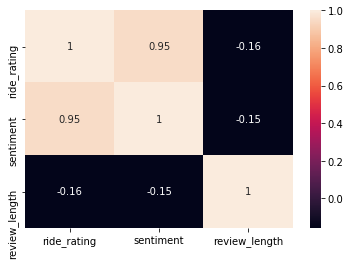

In [35]:
sns.heatmap(data=df.corr(), annot=True)

In [36]:
df_class = df[(df['ride_rating'] == 1) | (df['ride_rating'] == 5)] # Extracting the best and worst rating using a mask.
df_class.shape

(1165, 4)

In [ ]:
Setting our feature as the ride review and we want to predict the ride rating as 

In [38]:
X = df_class['ride_review']
y = df_class['ride_rating']

In [65]:
X[30]

'It completely outrageous I called Uber pick airport bring back home They gave service home airport three days prior arrival town To surprise charge travel time distance I paid The service distance location Never request services never request services'

# Modelling

In [43]:
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(X)

In [44]:
X_transformed

<1165x7287 sparse matrix of type '<class 'numpy.int64'>'
	with 60863 stored elements in Compressed Sparse Row format>

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

In [60]:
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
preds_nb = model_nb.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds_nb))
print('\n')
print(classification_report(y_test, preds_nb))

[[302   4]
 [ 38   6]]


             precision    recall  f1-score   support

          1       0.89      0.99      0.93       306
          5       0.60      0.14      0.22        44

avg / total       0.85      0.88      0.85       350

